####
# Proyecto grupo cu4tro: Estimación de gasto energético y rendimiento de vehiculos
### Minería de datos (TEL354)
#### -Sergio Ehlen Montero       | Rol USM : 202130016-3
#### -Daniel Fernández Martínez  | Rol USM : 202003004-9
####

### Propósito del proyecto
--

### Algoritmo a desarrollar
--

### Proceso de desarrollo

In [1]:
import pandas as pd
# Datos para vehiculos de combustible
# Para los vehiculos de combustible, los datos vienen separados en archivos por año
dfs=[]
archivos_gas = ["my1995-2004-fuel-consumption-ratings-5-cycle",
                "my2005-2014-fuel-consumption-ratings-5-cycle",
               "my2015-2019-fuel-consumption-ratings",
               "my2020-fuel-consumption-ratings",
               "my2021-fuel-consumption-ratings",
               "my2022-fuel-consumption-ratings",
               "my2023-fuel-consumption-ratings",
               "my2024-fuel-consumption-ratings"]
for f in archivos_gas:
    dfs.append(pd.read_csv("archive/"+f+".csv",encoding="ISO-8859-1"))
df_gas = pd.concat(dfs).reset_index(drop=True)
df_gas

Model year   Make          Model                    Vehicle class  \
0            1995  Acura        Integra                       Subcompact   
1            1995  Acura        Integra                       Subcompact   
2            1995  Acura   Integra GS-R                       Subcompact   
3            1995  Acura         Legend                          Compact   
4            1995  Acura   Legend Coupe                          Compact   
...           ...    ...            ...                              ...   
27772        2024  Volvo  V60 CC B5 AWD             Station wagon: Small   
27773        2024  Volvo  V90 CC B6 AWD          Station wagon: Mid-size   
27774        2024  Volvo    XC40 B5 AWD     Sport utility vehicle: Small   
27775        2024  Volvo    XC60 B5 AWD     Sport utility vehicle: Small   
27776        2024  Volvo    XC90 B6 AWD  Sport utility vehicle: Standard   

       Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                  1.8          4           A4         X             11.6   
1                  1.8          4           M5         X             11.0   
2                  1.8          4           M5         Z             10.8   
3                  3.2          6           A4         Z             14.2   
4                  3.2          6           A4         Z             14.6   
...                ...        ...          ...       ...              ...   
27772              2.0          4          AS8         Z             10.0   
27773              2.0          4          AS8         Z             10.7   
27774              2.0          4          AS8         Z              9.9   
27775              2.0          4          AS8         Z             10.6   
27776              2.0          4          AS8         Z             10.9   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                     8.3                 10.1              28   
1                     8.3                  9.8              29   
2                     8.3                  9.7              29   
3                    10.5                 12.5              23   
4                    11.0                 13.0              22   
...                   ...                  ...             ...   
27772                 7.5                  8.9              32   
27773                 8.1                  9.5              30   
27774                 7.8                  9.0              31   
27775                 8.3                  9.6              29   
27776                 8.6                  9.8              29   

       CO2 emissions (g/km)  CO2 rating  Smog rating  
0                       232         NaN          NaN  
1                       225         NaN          NaN  
2                       223         NaN          NaN  
3                       288         NaN          NaN  
4                       299         NaN          NaN  
...                     ...         ...          ...  
27772                   207         5.0          5.0  
27773                   223         5.0          7.0  
27774                   210         5.0          5.0  
27775                   226         5.0          5.0  
27776                   230         5.0          7.0  

[27777 rows x 15 columns]

In [2]:
# Datos para vehiculos eléctricos
df_ev = pd.read_csv("archive/my2012-2024-battery-electric-vehicles.csv",encoding="ISO-8859-1")
df_ev

Model year        Make               Model                 Vehicle class  \
0          2012  Mitsubishi              i-MiEV                    Subcompact   
1          2012      Nissan                LEAF                      Mid-size   
2          2013        Ford      Focus Electric                       Compact   
3          2013  Mitsubishi              i-MiEV                    Subcompact   
4          2013      Nissan                LEAF                      Mid-size   
..          ...         ...                 ...                           ...   
660        2024  Volkswagen      ID.4 AWD Pro S  Sport utility vehicle: Small   
661        2024       Volvo        C40 Recharge  Sport utility vehicle: Small   
662        2024       Volvo   C40 Recharge Twin  Sport utility vehicle: Small   
663        2024       Volvo       XC40 Recharge  Sport utility vehicle: Small   
664        2024       Volvo  XC40 Recharge Twin  Sport utility vehicle: Small   

     Motor (kW) Transmission Fuel type  City (kWh/100 km)  \
0            49           A1         B               16.9   
1            80           A1         B               19.3   
2           107           A1         B               19.0   
3            49           A1         B               16.9   
4            80           A1         B               19.3   
..          ...          ...       ...                ...   
660         250           A1         B               19.4   
661         185           A1         B               17.8   
662         300           A1         B               19.8   
663         185           A1         B               17.8   
664         300           A1         B               19.8   

     Highway (kWh/100 km)  Combined (kWh/100 km)  City (Le/100 km)  \
0                    21.4                   18.7               1.9   
1                    23.0                   21.1               2.2   
2                    21.1                   20.0               2.1   
3                    21.4                   18.7               1.9   
4                    23.0                   21.1               2.2   
..                    ...                    ...               ...   
660                  21.9                   20.5               2.2   
661                  21.8                   19.6               2.0   
662                  23.0                   21.2               2.2   
663                  22.0                   19.7               2.0   
664                  23.4                   21.4               2.2   

     Highway (Le/100 km)  Combined (Le/100 km)  Range (km)  \
0                    2.4                   2.1         100   
1                    2.6                   2.4         117   
2                    2.4                   2.2         122   
3                    2.4                   2.1         100   
4                    2.6                   2.4         117   
..                   ...                   ...         ...   
660                  2.5                   2.3         423   
661                  2.4                   2.2         478   
662                  2.6                   2.4         414   
663                  2.5                   2.2         472   
664                  2.6                   2.4         409   

     CO2 emissions (g/km)  CO2 rating   Smog rating  Recharge time (h)  
0                       0          NaN          NaN                7.0  
1                       0          NaN          NaN                7.0  
2                       0          NaN          NaN                4.0  
3                       0          NaN          NaN                7.0  
4                       0          NaN          NaN                7.0  
..                    ...          ...          ...                ...  
660                     0         10.0         10.0                8.0  
661                     0         10.0         10.0                8.0  
662                     0         10.0         10.0     

In [3]:
# Datos para vehiculos híbridos
df_hb = pd.read_csv("archive/my2012-2024-plug-in-hybrid-electric-vehicles.csv",encoding="ISO-8859-1")
df_hb

Model year       Make                 Model  \
0          2012  Chevrolet                  Volt   
1          2013  Chevrolet                  Volt   
2          2013       Ford          C-MAX Energi   
3          2013       Ford         Fusion Energi   
4          2013     Toyota  Prius Plug-in Hybrid   
..          ...        ...                   ...   
288        2024      Volvo   S60 T8 AWD Recharge   
289        2024      Volvo   S90 T8 AWD Recharge   
290        2024      Volvo   V60 T8 AWD Recharge   
291        2024      Volvo  XC60 T8 AWD Recharge   
292        2024      Volvo  XC90 T8 AWD Recharge   

                       Vehicle class  Motor (kW)  Engine size (L)  Cylinders  \
0                            Compact         111              1.4          4   
1                            Compact         111              1.4          4   
2                           Mid-size          35              2.0          4   
3                           Mid-size          35              2.0          4   
4                           Mid-size          60              1.8          4   
..                               ...         ...              ...        ...   
288                          Compact         107              2.0          4   
289                         Mid-size         107              2.0          4   
290             Station wagon: Small         107              2.0          4   
291     Sport utility vehicle: Small         107              2.0          4   
292  Sport utility vehicle: Standard         107              2.0          4   

    Transmission Fuel type 1               Combined Le/100 km  Range 1 (km)  \
0             AV           B            2.5 (22.3 kWh/100 km)            56   
1             AV           B            2.4 (21.4 kWh/100 km)            61   
2             AV         B/X  2.7 ([23.2 kWh + 0.1 L]/100 km)            32   
3             AV         B/X  2.7 ([23.2 kWh + 0.1 L]/100 km)            32   
4             AV         B/X  2.5 ([18.0 kWh + 0.4 L]/100 km)            18   
..           ...         ...                              ...           ...   
288          AS8        B/Z*  3.0 ([27.2 kWh + 0.0 L]/100 km)            64   
289          AS8        B/Z*  3.4 ([30.0 kWh + 0.0 L]/100 km)            61   
290          AS8        B/Z*  3.0 ([27.2 kWh + 0.0 L]/100 km)            64   
291          AS8        B/Z*  3.5 ([31.2 kWh + 0.0 L]/100 km)            58   
292          AS8        B/Z*  3.8 ([34.4 kWh + 0.0 L]/100 km)            53   

     Recharge time (h) Fuel type 2  City (L/100 km)  Highway (L/100 km)  \
0                  4.0           Z              6.7                 5.9   
1                  4.0           Z              6.7                 5.9   
2                  2.5           X              5.8                 6.5   
3                  2.5           X              5.8                 6.5   
4                  1.5           X              4.7                 4.8   
..                 ...         ...              ...                 ...   
288                5.0           Z              8.0                 7.2   
289                5.0           Z              8.5                 7.6   
290                5.0           Z              8.0                 7.2   
291                5.0           Z              8.5                 8.5   
292                5.0           Z              9.1                 8.6   

     Combined (L/100 km)  Range 2 (km)  CO2 emissions (g/km)  CO2 rating  \
0                    6.4           550                    54         NaN   
1                    6.4           550                    45         NaN   
2                    6.1           856                    80         NaN   
3                    6.1           856                    80         NaN   
4                    4.7           845                   101         NaN   
..                   ...           ...                   ...         ...   
288                  7.6           79

In [4]:
# Funciones a usar para entrenar los algoritmos de regresión
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import time
import seaborn as sns
import matplotlib.pyplot as plt

def to_dummies(data,encoder,variables):
    d_num=data.drop(columns=variables)
    d_enc=encoder.transform(data[variables])
    return d_num.reset_index(drop=True).join(pd.DataFrame(d_enc,columns=encoder.get_feature_names_out()))
    
def entrenar_algoritmo(nombre_algoritmo,dataframe,vars):
    x_vars = vars["x"]
    y_vars = vars["y"]
    ign_vars = vars["ign"]
    cat_vars = vars["cat"]
    start_time = time.time()
    enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
    enc.fit(dataframe[cat_vars])
    df_d = to_dummies(dataframe,enc,cat_vars)
    rem = y_vars + ign_vars
    X=df_d.drop(columns=rem)
    Y=df_d[y_vars]
    krr = KernelRidge(alpha=1,kernel="rbf")
    krr.fit(X,Y)
    print("Entrenado algoritmo "+nombre_algoritmo+" en "+str(time.time() - start_time)+" segundos.")
    return [krr,enc]

def predict_consumption(x,krr,enc,vars):
    d = to_dummies(x,enc,vars["cat"])
    y_p = krr.predict(d)
    return pd.DataFrame(y_p,columns=vars["y"])

def graficar_prediccion(pred,real,vars,nombre):
    plt.figure(figsize=(6,8))
    df1 = real
    df1["Origen"] = "Datos reales"
    df2 = pred
    df2["Origen"] = "Datos predecidos"
    plot = sns.pairplot(pd.concat([df1,df2]),x_vars=vars["x"],y_vars=vars["y"],hue="Origen",
                 plot_kws=dict(s=20, alpha=0.4))
    plt.savefig("grafico_"+nombre+".png")
    plt.suptitle('Rendimiento datos de testing vs datos reales para vehiculos '+nombre, y=1.05)
    plt.show()

In [5]:
# Entrenamiento de algoritmo para vehículos de combustion
gas_vars = {}
gas_vars["x"] = ["Model year","Engine size (L)","Cylinders"]
gas_vars["y"] =["City (L/100 km)","Highway (L/100 km)"]
gas_vars["ign"] = ["CO2 rating","Smog rating","CO2 emissions (g/km)","Combined (mpg)","Combined (L/100 km)"]
gas_vars["cat"] = ["Make","Model","Vehicle class","Transmission","Fuel type"]

# WARNING!
# Esta sección del código es fuertemente demandante en recursos; en específico memoria RAM
# Esta es la configuración usada para nuestro entrenamiento, pero si no se poseen los recursos 
# necesarios se puede aumentar la proporción del train-test split
# Incluso si se tienen los r
df_gas_train, df_gas_test = train_test_split(df_gas, test_size = 0.3,random_state=1)
[algoritmo_combustible,encoder_combustible]=entrenar_algoritmo("Combustible",df_gas_train,gas_vars)

Y_pred_gas = predict_consumption(df_gas_test[gas_vars["x"]+gas_vars["cat"]], algoritmo_combustible, encoder_combustible,gas_vars)
errores_gas = {}
for c in gas_vars["y"]:
    errores_gas[c]=(mean_squared_error(df_gas_test[c],Y_pred_gas[c]))**0.5

print("\nError cuadratico medio reportado para las variables de predicción")
pd.concat([pd.DataFrame(errores_gas,index=["error"]),
           df_gas.describe()[(df_gas.describe().index=="mean")|(df_gas.describe().index=="std")][gas_vars["y"]]])

Entrenado algoritmo Combustible en 97.72380065917969 segundos.

Error cuadratico medio reportado para las variables de predicción


City (L/100 km)  Highway (L/100 km)
error         1.664822            1.301875
mean         13.803010            9.995392
std           3.740912            2.584177

<Figure size 600x800 with 0 Axes>

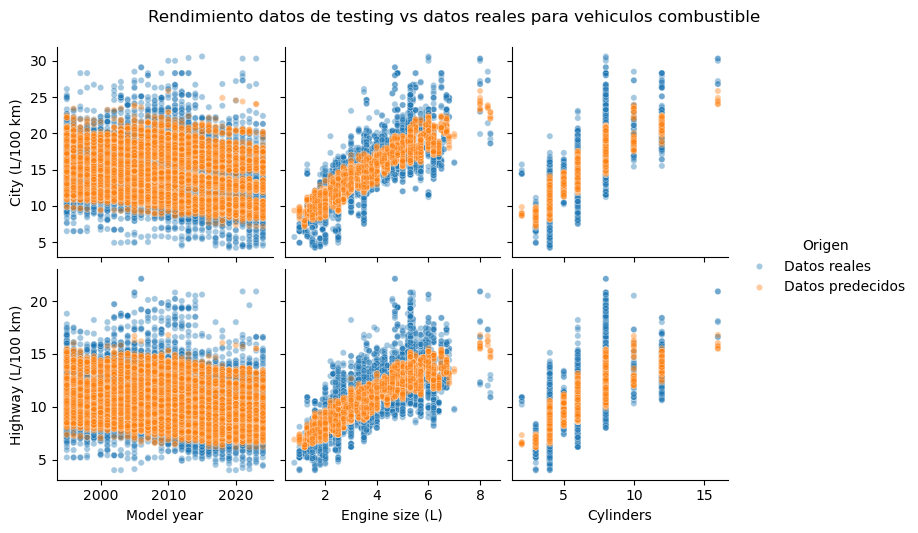

In [6]:
graficar_prediccion(Y_pred_gas.join(df_gas_test[gas_vars["x"]+gas_vars["cat"]].reset_index()),df_gas_test,gas_vars,"combustible")

In [7]:
# Entrenamiento de algoritmo para vehículos eléctricos
ev_vars = {}
ev_vars["x"] = ["Model year","Motor (kW)"]
ev_vars["y"] = ["City (kWh/100 km)","Highway (kWh/100 km)",'Range (km)','Recharge time (h)']
ev_vars["ign"] = ["CO2 rating ","Smog rating","CO2 emissions (g/km)","Combined (kWh/100 km)",'City (Le/100 km)',
       'Highway (Le/100 km)', 'Combined (Le/100 km)',"Fuel type"]
ev_vars["cat"] = ["Make","Model","Vehicle class","Transmission"]

df_ev_train, df_ev_test = train_test_split(df_ev, test_size = 0.3,random_state=1)
[algoritmo_electricos,encoder_electricos]=entrenar_algoritmo("Electricos", df_ev_train,ev_vars)

Y_pred_ev = predict_consumption(df_ev_test[ev_vars["x"]+ev_vars["cat"]],algoritmo_electricos, encoder_electricos,ev_vars)
errores_ev = {}
for c in ev_vars["y"]:
    errores_ev[c]=(mean_squared_error(df_ev_test[c],Y_pred_ev[c]))**0.5

print("\nError cuadratico medio reportado para las variables de predicción:")
pd.concat([pd.DataFrame(errores_ev,index=["error"]),
           df_ev.describe()[(df_ev.describe().index=="mean")|(df_ev.describe().index=="std")][ev_vars["y"]]])

Entrenado algoritmo Electricos en 0.06484413146972656 segundos.

Error cuadratico medio reportado para las variables de predicción:


City (kWh/100 km)  Highway (kWh/100 km)  Range (km)  Recharge time (h)
error           3.687458              4.064271   70.743099           1.630887
mean           21.569023             23.671729  423.972932          10.149248
std             4.827457              5.023905  132.832667           2.773825

<Figure size 600x800 with 0 Axes>

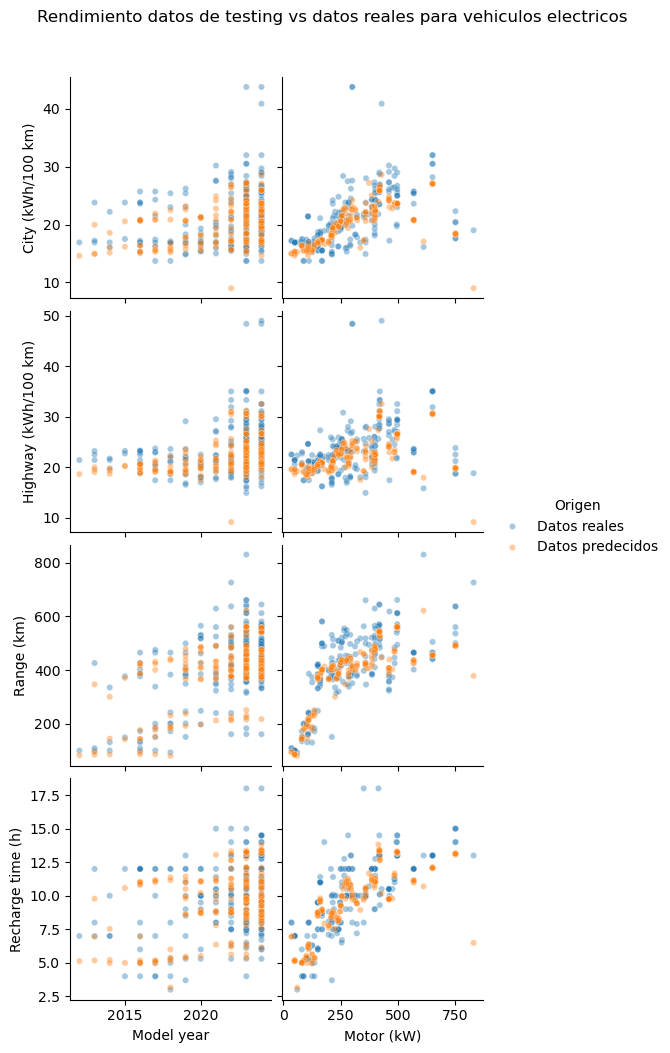

In [8]:
graficar_prediccion(Y_pred_ev.join(df_ev_test[ev_vars["x"]+ev_vars["cat"]].reset_index()),df_ev_test,ev_vars,"electricos")

In [9]:
# Entrenamiento de algoritmo para vehículos híbridos
hb_vars = {}
hb_vars["x"]= ["Model year","Motor (kW)","Engine size (L)","Cylinders"]
hb_vars["y"] = ["City (L/100 km)","Highway (L/100 km)",'Range 1 (km)','Range 2 (km)','Recharge time (h)']
hb_vars["ign"] = ["Combined Le/100 km","Combined (L/100 km)","CO2 emissions (g/km)","CO2 rating","Smog rating"]
hb_vars["cat"] = ["Make","Model","Vehicle class","Transmission","Fuel type 1","Fuel type 2"]

df_hb_train, df_hb_test = train_test_split(df_hb, test_size = 0.3,random_state=1)
[algoritmo_hibridos,encoder_hibridos]=entrenar_algoritmo("Híbrido", df_hb_train,hb_vars)

Y_pred_hb = predict_consumption(df_hb_test[hb_vars["x"]+hb_vars["cat"]],algoritmo_hibridos,encoder_hibridos,hb_vars)
errores_hb = {}
for c in hb_vars["y"]:
    errores_hb[c]=(mean_squared_error(df_hb_test[c],Y_pred_hb[c]))**0.5

print("\nError cuadratico medio reportado para las variables de predicción")
pd.concat([pd.DataFrame(errores_hb,index=["error"]),
           df_hb.describe()[(df_hb.describe().index=="mean")|(df_hb.describe().index=="std")][hb_vars["y"]]])

Entrenado algoritmo Híbrido en 0.020375967025756836 segundos.

Error cuadratico medio reportado para las variables de predicción


City (L/100 km)  Highway (L/100 km)  Range 1 (km)  Range 2 (km)  \
error         2.389539            1.493560     19.694727    138.111708   
mean          8.815017            7.932765     46.081911    654.078498   
std           2.936470            1.938777     31.315126    190.982420   

       Recharge time (h)  
error           0.767377  
mean            3.269966  
std             1.235735

<Figure size 600x800 with 0 Axes>

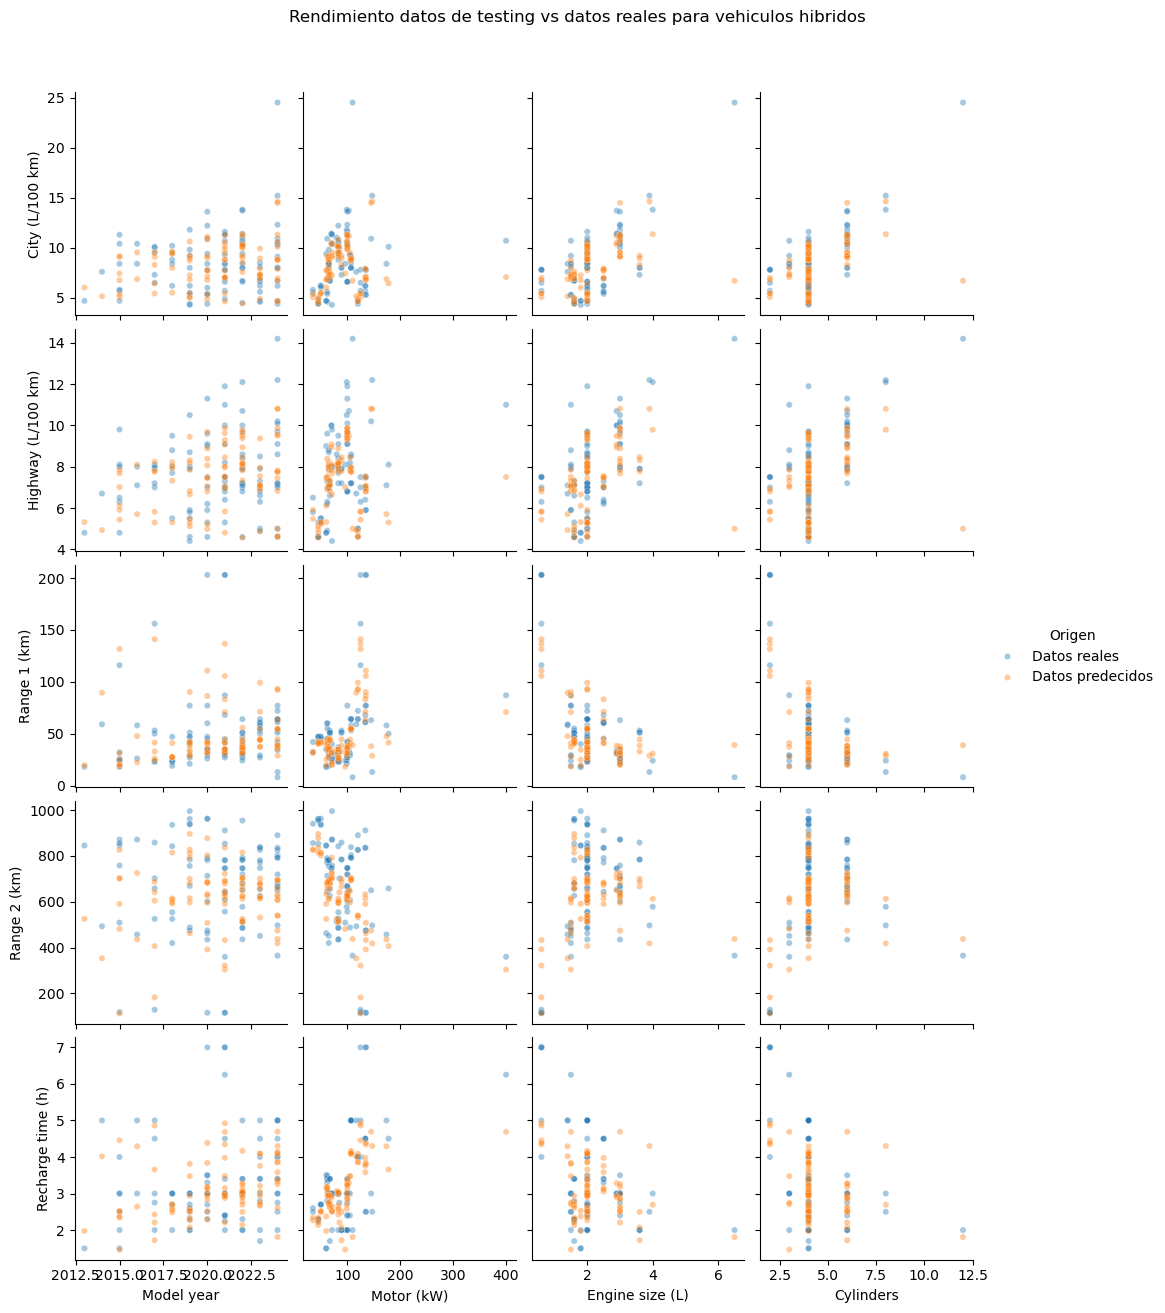

In [10]:
graficar_prediccion(Y_pred_hb.join(df_hb_test[hb_vars["x"]+hb_vars["cat"]].reset_index()),df_hb_test,hb_vars,"hibridos")

In [11]:
# Estimacion de datos mas cercanos

def n_mas_cercanos(dato,columnas,dataset,n):
    df1= pd.concat([dato]*len(dataset.index))
    df2= dataset[columnas]
    df2["distancia"]=np.linalg.norm(df1[columnas].values - df2[columnas].values, axis=1)
    return dataset.iloc[df2.sort_values(by='distancia').head(n).index]
pd.options.mode.chained_assignment = None

demo = df_ev_test.sample(1,random_state=3).reset_index()
X_demo = demo[ev_vars["x"]+ev_vars["cat"]]
X_demo

Model year  Motor (kW)   Make        Model                 Vehicle class  \
0        2022         291  Tesla  Model Y AWD  Sport utility vehicle: Small   

  Transmission  
0           A1

In [12]:
Y_pred=predict_consumption(X_demo,algoritmo_electricos,encoder_electricos,ev_vars)
Y_pred

City (kWh/100 km)  Highway (kWh/100 km)  Range (km)  Recharge time (h)
0          20.839005             22.029325  442.985406          10.844067

In [13]:
n_mas_cercanos(Y_pred,ev_vars["y"],df_ev,10)

Model year           Make                                Model  \
595        2024       Polestar            2 Dual Motor (19" Wheels)   
252        2022           Ford    Mustang Mach-E Extended Range AWD   
263        2022            Kia                   EV6 Long Range AWD   
466        2023     Volkswagen                             ID.4 Pro   
577        2024  Mercedes-Benz                 EQE 500 4MATIC Sedan   
544        2024          Honda                 Prologue Touring AWD   
589        2024         Nissan                ARIYA Evolve+ e-4ORCE   
511        2024      Chevrolet                 Blazer EV 2LT/RS AWD   
487        2024            BMW  i4 xDrive40 Gran Coupe (19" Wheels)   
482        2024            BMW  i4 eDrive35 Gran Coupe (18" Wheels)   

                       Vehicle class  Motor (kW) Transmission Fuel type  \
595                         Mid-size         310           A1         B   
252     Sport utility vehicle: Small         258           A1         B   
263             Station wagon: Small         239           A1         B   
466     Sport utility vehicle: Small         150           A1         B   
577                         Mid-size         300           A1         B   
544  Sport utility vehicle: Standard         247           A1         B   
589             Station wagon: Small         290           A1         B   
511     Sport utility vehicle: Small         247           A1         B   
487                       Subcompact         295           A1         B   
482                       Subcompact         210           A1         B   

     City (kWh/100 km)  Highway (kWh/100 km)  Combined (kWh/100 km)  \
595               18.7                  21.0                   19.7   
252               21.6                  24.9                   23.1   
263               18.0                  22.4                   19.9   
466               18.2                  21.3                   19.6   
577               23.6                  23.6                   23.6   
544               21.1                  25.0                   22.8   
589               21.5                  24.3                   22.8   
511               20.3                  23.8                   21.9   
487               21.5                  20.9                   21.2   
482               17.2                  17.7                   17.4   

     City (Le/100 km)  Highway (Le/100 km)  Combined (Le/100 km)  Range (km)  \
595               2.1                  2.4                   2.2         444   
252               2.4                  2.8                   2.6         446   
263               2.0                  2.5                   2.2         441   
466               2.0                  2.4                   2.2         443   
577               2.6                  2.6                   2.6         446   
544               2.4                  2.8                   2.6         439   
589               2.4                  2.7                   2.5         438   
511               2.3                  2.7                   2.5         449   
487               2.4                  2.3                   2.4         449   
482               1.9                  2.0                   2.0         444   

     CO2 emissions (g/km)  CO2 rating   Smog rating  Recharge time (h)  
595                     0         10.0         10.0                8.0  
252                     0         10.0         10.0               10.7  
263                     0         10.0         10.0                8.4  
466                     0         10.0         10.0                7.5  
577                     0         10.0         10.0                9.5  
544                     0         10.0         10.0                9.5  
589                     0         10.0         10.0               13.0  
511                     0         10.0         10.0                9.5  
487                     0         10.0         10.0                8.0  
482 

In [14]:
#Remover
df_gas_test[(df_gas_test["Make"]=="Toyota")&(df_gas_test["Model"]=="Corolla")&(df_gas_test["Model year"]==2008)]

Model year    Make    Model Vehicle class  Engine size (L)  Cylinders  \
11314        2008  Toyota  Corolla       Compact              1.8          4   

      Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
11314           A4         X              9.1                 6.7   

       Combined (L/100 km)  Combined (mpg)  CO2 emissions (g/km)  CO2 rating  \
11314                  8.0              35                   184         NaN   

       Smog rating        Origen  
11314          NaN  Datos reales